In [1]:
import calendar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Used to print bold text
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Spits out number of missing values for each field in a table
def missing_values(d, n):
    total_missing = d.isnull().sum().sort_values(ascending=False)
    percent_missing = (d.isnull().sum()/d.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'], sort=False)
    print(color.BOLD + get_df_name(d) + ' Missing Values:' + color.END)
    print(missing_data.head(n))

In [4]:
# Gets the name of a dataframe (used when df.name doesn't work)
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [5]:
# Used to slice the category field
def right_slice(x):
    if x.rfind('>') == -1:
        i = 0
    else:
        i = -1 * (len(x) - x.rfind('>')) + 2
    return x[i:]

## Bringing the Data In

*After a little digging around I found 4 records in the products file with characters that were confusing pandas (/ and "). Had the issue been more widespread with different strings causing the issue, I would have dealt with it in a more robust and scalable manner. But since they were all the same instance of "\Mini\"", I dealt with it as such.*

In [6]:
csvfileIn = open(r'C:\Users\Pat\Documents\Work\Projects\Extend\products.csv', 'r', encoding='mbcs')
csvOut = open(r'C:\Users\Pat\Documents\Work\Projects\Extend\products2.csv', 'w', encoding='mbcs')

for i, row in enumerate(csvfileIn):
    row = row.replace('\\\"Mini\\\",', 'Mini')
    csvOut.write(row)

csvOut.close()
csvfileIn.close()

In [7]:
merchants_df = pd.read_csv(r'C:\Users\Pat\Documents\Work\Projects\Extend\merchants.csv', encoding = 'ISO-8859-1')
products_df = pd.read_csv(r'C:\Users\Pat\Documents\Work\Projects\Extend\products2.csv', encoding = 'ISO-8859-1')
orders_df = pd.read_csv(r'C:\Users\Pat\Documents\Work\Projects\Extend\orders.csv', encoding = 'ISO-8859-1')
orderlines_df = pd.read_csv(r'C:\Users\Pat\Documents\Work\Projects\Extend\order_lines.csv', encoding = 'ISO-8859-1')
contracts_df = pd.read_csv(r'C:\Users\Pat\Documents\Work\Projects\Extend\contracts.csv', encoding = 'ISO-8859-1')

# Create list of dataframes for future use
files = [merchants_df,  products_df, orders_df, orderlines_df, contracts_df]

### Preview of Tables

*Note the tables are sorted by granularity (parent table up top)*

In [8]:
merchants_df.head(n=3)

,sortkey,name,createdat,enabled,approved,merchantcut,storetype
0,STORE::fd8f6538-a246-4fc8-b179-ca40fccfbb25,PowerMassagerPros,2019-08-13 23:00:31.000000,True,True,0.25,Sports & Fitness Equipment
1,STORE::780a27f2-578d-4455-818f-77b48453ffb9,ElectricSkatePark,2020-02-15 18:46:36.837000,True,True,0.20,Sports & Fitness Equipment
2,STORE::661964ec-5d06-4dea-bbb2-56d3b9817a98,FitnessWareables,2019-11-18 20:36:57.000000,True,True,0.30,Sports & Fitness Equipment


In [9]:
products_df.head(n=3)

,store_id,variant_id,category,price,warranty_status,enabled,approved
0,13863c72-0af2-4996-ae43-a4217292b826,3.020660e+13,Electronics > Computers > Laptops,185.00,NaN,True,True
1,13863c72-0af2-4996-ae43-a4217292b826,3.024991e+13,Electronics > Computers > Laptops,560.99,NaN,True,True
2,13863c72-0af2-4996-ae43-a4217292b826,3.025177e+13,Laptop,151.99,NaN,True,True


In [10]:
orders_df.head(n=3)

,order_id,app_id,source_name,ordered_at,total_price,subtotal_price,total_discount,shipping_country,store_id
0,2084411998340,580111,web,2020-03-23 04:27:01+00,66.00,66.00,0.0,NaN,a5e80a29-c6af-446f-b569-f021e697c48c
1,2180040425590,580111,web,2020-05-02 15:25:35+00,251.99,251.99,0.0,United States,661964ec-5d06-4dea-bbb2-56d3b9817a98
2,2185892200566,580111,web,2020-05-04 19:41:09+00,197.33,183.99,46.0,United States,cbc0b107-7112-4a84-9a5f-a1cfdcfcfdbd


In [11]:
orderlines_df.head(n=3)

,line_item_id,order_id,variant_id,quantity,price,product_purchase_price,discount_per_item,is_warrantable,is_warranty
0,4730634797174,2141983408246,3.131829e+13,1,25.0,25.0,0.0,False,False
1,4841816752246,2194646532214,3.109589e+13,1,229.0,229.0,0.0,True,False
2,4830647713910,2189327073398,3.109589e+13,3,229.0,229.0,0.0,True,False


In [12]:
contracts_df.head(n=3)

,contract_id,variant_id,store_id,plan_id,ordered_at,plan_purchase_price,is_refunded,contract_length_years,line_item_id
0,001a6812-809e-4318-873d-4124742b7b69,30143018631191,0d92cbe4-2d26-4c81-ae4e-7ace36b6700b,10001-misc-elec-base-replace-1y,2020-05-07 19:26:23.000000,23.99,False,1.0,4.507782e+12
1,01f5a99c-2a60-4080-950d-3607699c07c9,31095887003766,661964ec-5d06-4dea-bbb2-56d3b9817a98,10001-misc-elec-base-replace-1y,2020-05-06 00:48:11.000000,22.99,False,1.0,4.830406e+12
2,01836ce1-283e-4979-a1c1-b6e876b9ab34,31437319733291,fb650744-0bf1-4662-a98c-b7a35f5f540f,10001-laptop-base-replace-2y,2020-03-24 17:24:38.000000,31.99,False,2.0,4.414598e+12


# Exploratory Data Analysis

## A Little Bit of Cleaning

#### Replace any potential whitespace with NaN

In [13]:
for d in files:
    d = d.replace(r'^\s*$', np.nan, regex=True)

####  I need to join the merchants and products table on the sortkey and store_id fields respectively, however it looks like the sortkeys all start with the string "STORE::" while their corresponding store_id's do not. I'll need to get rid of that first.

In [14]:
# Remove "STORE::" from sortkey
merchants_df['sortkey2'] = merchants_df['sortkey'].str[7:]

#### For the proucts table, there are a lot of instances where we have several category nodes. For example "Electronics > Computers > Laptops" instead of just "Laptops". Let's fix that by taking everything to the right of the rightmost instance of ">".

In [15]:
# Convert numerical category values to a string for right_slice function
products_df['category'] = np.where(pd.isnull(products_df['category']),
                                   products_df['category'],products_df['category'].astype(str))

# Remove everything to the left of the rightmost ">" (if applicable)
products_df['category2'] = products_df['category'].apply(lambda x: right_slice(x) if pd.notnull(x) else x)

# Drop original category
products_df.drop(['category'], axis=1, inplace=True)

In [16]:
# Create year and month fields for ordered_at in orders and contracts tables
orders_df['ordered_at'] = pd.to_datetime(orders_df['ordered_at'])
orders_df['year_ordered'] = pd.DatetimeIndex(orders_df['ordered_at']).year
orders_df['month_ordered_int'] = pd.DatetimeIndex(orders_df['ordered_at']).month
orders_df['month_ordered'] = orders_df['month_ordered_int'].apply(lambda x: calendar.month_abbr[x])
contracts_df['ordered_at'] = pd.to_datetime(contracts_df['ordered_at'])
contracts_df['year_ordered'] = pd.DatetimeIndex(contracts_df['ordered_at']).year
contracts_df['month_ordered_int'] = pd.DatetimeIndex(contracts_df['ordered_at']).month
contracts_df['month_ordered'] = contracts_df['month_ordered_int'].apply(lambda x: calendar.month_abbr[x])

In [17]:
# Round Contract Length
contracts_df['contract_length_years'] = contracts_df['contract_length_years'].round(decimals=1)

In [18]:
# Check what years/months we have data for
print(orders_df['year_ordered'].unique())
print(orders_df['month_ordered'].unique())
print(contracts_df['year_ordered'].unique())
print(contracts_df['month_ordered'].unique())

[2020]
['Mar' 'May' 'Apr']
[2020]
['May' 'Mar' 'Apr']


#### It looks like there are 586 duplicate line_item_id's in the contracts table. Though they all have a unique contract_id's, I spot checked a few and they otherwise had identical information. Later on I'll be bringing contract detail to the order line table. Since I don't want duplicate order lines, I'm going to assume that there should only be one contract per order line and that these extra contracts are erroneous and will remove them.

*A last-minute realization I had was that an order line might have multiple quantities of a product, in which case multiple contracts per orderline might make sense. Or it's also possible that there are contracts in the contracts table that were quoted but not bound. As I realized this pretty late, I'll stick with the earlier assumption I made and drop the duplicate contracts.*

In [19]:
contracts_df.drop_duplicates(subset=['line_item_id'], inplace=True)

## Joining the Tables

### Merchant > Product

In [20]:
# Bring in merchant details to the products table
join_col = ['sortkey2', 'name', 'merchantcut', 'storetype']
products_df2 = (pd.merge(products_df, merchants_df[join_col], how='left', left_on=['store_id'],
                        right_on=['sortkey2'], suffixes=['','_mrcht'])
                .rename(columns={'name':'store_name'}))

# Check that every store_id in products table has corresponding sortkey in merchants table
print('Join Check:')
print(len(products_df2[(products_df2['sortkey2'].isnull()) & (~products_df2['store_id'].isnull())]))
products_df2.drop(['sortkey2'], axis=1, inplace=True)

Join Check:
0


### Order > Order Line

In [21]:
# Bring in order details to the order lines table
join_col2 = ['order_id', 'shipping_country', 'store_id', 'ordered_at', 'year_ordered', 'month_ordered', 'month_ordered_int']
orderlines_df0 = pd.merge(orderlines_df, orders_df[join_col2],
                          how='left', on=['order_id'], suffixes=['','_ordr'])

# Check that every order_id in order lines table has a corresponding value orders table
print('Join Check:')
print(len(orderlines_df0[orderlines_df0['store_id'].isnull()]))

Join Check:
0


#### Since there are a lot variant_id's missing from the order lines table (discovered further below), we can't bring in merchant details from products_df2. We'll have to do two separate joins, and will unfortunately not have the product details for those missing variant_id's.

### Merchant > Order Line

In [22]:
# Bring in merchant details to order lines table
orderlines_df2 = (pd.merge(orderlines_df0, merchants_df[join_col], how='left', left_on=['store_id'],
                        right_on=['sortkey2'], suffixes=['','_mrcht'])
                .rename(columns={'name':'store_name'}))

# Check that every store_id in order lines table has a corresponding sortkey in merchants table
print('Join Check:')
print(len(orderlines_df2[orderlines_df2['merchantcut'].isnull()]))

Join Check:
0


### Product > Order Line

In [23]:
# Bring in product details to order lines table
join_col3 = ['store_id', 'variant_id', 'price', 'warranty_status', 'enabled', 'approved', 'category2']
orderlines_df2 = pd.merge(orderlines_df2, products_df2[join_col3], how='left',
                          on=['variant_id', 'store_id'], suffixes=['', '_prdct'])

orderlines_df2['category2'] = orderlines_df2['category2'].fillna('Unknown')

# Check that non-null store_id and variant_id in order lines table have a corresponding values products table
x1 = len(products_df)
x2 = len(orderlines_df)
x3 = len(orderlines_df2[orderlines_df2['variant_id'].isnull()])
x4 = len(orderlines_df2[orderlines_df2['enabled'].isnull()])
x5 = x4 - x3
print('Join Check:')
print('')
print('Number of rows in products table: ' + str(x1))
print('Number of rows in order lines table: ' + str(x2))
print('Number of variant_id''s missing from order lines table: ' + str(x3))
print(color.BOLD + 'Number of non-null variant_id\'s in order lines table missing from products table: ' + str(x5) + color.END)

Join Check:

Number of rows in products table: 86598
Number of rows in order lines table: 147041
Number of variant_ids missing from order lines table: 2579
Number of non-null variant_id's in order lines table missing from products table: 11054


### Order Line > Contracts

In [24]:
# Bring in order line details to the contract table
contracts_df2 = (pd.merge(contracts_df, orderlines_df2, how='left', on=['line_item_id'], suffixes=['','_ordrln'])
                 .drop(['variant_id_ordrln', 'store_id_ordrln'], axis=1))

# Check that every line_item_id in contracts table has a corresponding value in order line table
print('Join Check:')
contracts_df2[contracts_df2['is_warranty'].isnull()]

Join Check:


,contract_id,variant_id,store_id,plan_id,ordered_at,plan_purchase_price,is_refunded,contract_length_years,line_item_id,year_ordered,...,month_ordered_int_ordrln,sortkey2,store_name,merchantcut,storetype,price_prdct,warranty_status,enabled,approved,category2
860,3946fad9-6ed4-4985-8834-1cb4fa25de7f,9675257643065,2e1df809-4f73-4943-9bde-49fdbeddb8fc,10001-misc-elec-base-replace-3y,2020-05-26 18:39:13,20.99,False,3.0,NaN,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We seem to be missing one line_item_id. That's not bad and shouldn't really have an impact on anything.

### Contracts > Order Line

In [25]:
# Bring in contract details up to orderline table
join_col4 = ['line_item_id', 'plan_purchase_price', 'is_refunded', 'contract_length_years']
orderlines_df3 = (pd.merge(orderlines_df2, contracts_df2[join_col4], how='left', on=['line_item_id'], suffixes=['','_cntrt']))
orderlines_df3['line_item_count'] = orderlines_df3.groupby('line_item_id')['line_item_id'].transform('count')

# Check that every line_item_id in order lines table with warranty has a corresponding value in contracts table
print('Join Check:')
contract_check = orderlines_df3[(orderlines_df3['contract_length_years'].isnull()) & (orderlines_df3['is_warranty']==True)]
print(len(contract_check))

Join Check:
4364


#### For some reason there are 4364 order lines that are labeled as having a warranty attached but don't have a corresponding contract in the contracts table.

## Identifying Columns with Missing Data

In [26]:
for d in files:
    missing_values(d, 5)
    print('')

merchants_df Missing Values:
             Total  Percent
sortkey2         0      0.0
storetype        0      0.0
merchantcut      0      0.0
approved         0      0.0
enabled          0      0.0

products_df Missing Values:
                 Total   Percent
price            37770  0.436153
category2         7377  0.085187
approved          6995  0.080776
warranty_status   2386  0.027553
enabled             72  0.000831

orders_df Missing Values:
                   Total   Percent
shipping_country     126  0.001538
month_ordered          0  0.000000
month_ordered_int      0  0.000000
year_ordered           0  0.000000
store_id               0  0.000000

orderlines_df Missing Values:
                        Total   Percent
is_warrantable           7152  0.048639
variant_id               2579  0.017539
is_warranty                 0  0.000000
discount_per_item           0  0.000000
product_purchase_price      0  0.000000

contracts_df Missing Values:
                       Total   Percent

### Missing Values: category, approved, and warranty_status fields in products_df

#### There are a good amount of rows missing in the products table for these fields. I'm not really sure if there's anything I can do about it, so I'll just make a note of it and move on for now.

### Missing Values: price field in products_df

#### The products table is missing a lot of prices. I don't think there's anything I can do about this either. But since the price field exists in a child table, I'm going to bring in price by variant_id and store_id from orderlines_df to see if that helps us fill in the missing values. Assuming these are coming from a proper relational database, I don't imagine it will. But as I'm unfamiliar with the data source and to be extra thorough I'll do a quick check...

In [27]:
# Bring in price from orderlines_df to products_df and fill price with values from orderlines_df if we can
products_df3 = pd.merge(products_df, orderlines_df2, how='left', on=['store_id', 'variant_id'], suffixes=['','_orders'])

# Check if we're able to fill in any values
products_df3[(products_df3['price'].isnull()) & (~products_df3['price_orders'].isnull())]

,store_id,variant_id,price,warranty_status,enabled,approved,category2,line_item_id,order_id,quantity,...,month_ordered_int,sortkey2,store_name,merchantcut,storetype,price_prdct,warranty_status_orders,enabled_orders,approved_orders,category2_orders


#### As expected, if a price is missing from the products table it will be missing in the order_line table. So not much I else I can do here. Fortunately the order_lines table is not missing any prices, which I believe is what's most important here.

### Missing Values: is_warrantable in orderlines_df 

#### The is_warrantable field in the orderlines_df dataframe stands out to me. Any time the is_warranty field is True, we know the is_warrantable field shoud be True as well.

In [28]:
orderlines_df3['is_warrantable'] = np.where(orderlines_df3['is_warranty'] == True, True, orderlines_df3['is_warrantable'])

# Remember columns for col_orderline
col_orderline = orderlines_df.columns.tolist()

# Remove joined columns (just for missing values check), we only want to check for the columns in original table
orderlines_df4 = orderlines_df3[col_orderline]

missing_values(orderlines_df4, 3)

orderlines_df4 Missing Values:
                Total   Percent
is_warrantable   2844  0.019342
variant_id       2579  0.017539
is_warranty         0  0.000000


#### That took care of 4308 of the 7152 missing values. We brought in the warranty_status from the products table, let's see if we can use that to fill in the rest.

In [29]:
orderlines_df3['is_warrantable'] = np.where(orderlines_df3['warranty_status'] == 'warrantable', True,
                                            orderlines_df3['is_warrantable'])

# Remove joined columns (just for missing values check), we only want to check for the columns in original table
orderlines_df4 = orderlines_df3[col_orderline]

missing_values(orderlines_df4, 3)

orderlines_df4 Missing Values:
                Total   Percent
is_warrantable   2817  0.019158
variant_id       2579  0.017539
is_warranty         0  0.000000


#### That helped a little bit more. I think that's all we can do for this one.

## Revenue by Month

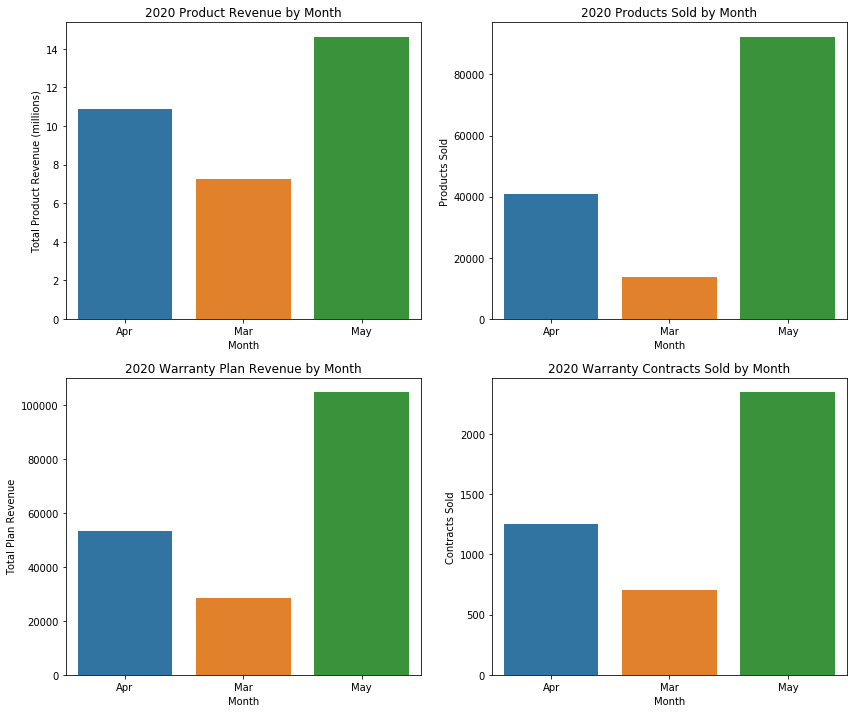

In [30]:
f, axes = plt.subplots(2, 2,  figsize=(14,12))

# Group order lines by month
orderlines_month_df = (orderlines_df2.groupby(['month_ordered']).agg({'price':'sum', 'line_item_id':'count'}).reset_index()
                   .rename(columns={'price':'total_product_revenue', 'line_item_id':'line_item_count'}))
orderlines_month_df['total_product_revenue'] = orderlines_month_df['total_product_revenue'] / 1000000

# Plot product revenue and count by month
(sns.barplot(x = 'month_ordered', y = 'total_product_revenue', data = orderlines_month_df, ax = axes[0,0])
      .set(title='2020 Product Revenue by Month', xlabel='Month', ylabel='Total Product Revenue (millions)'))
(sns.barplot(x = 'month_ordered', y = 'line_item_count', data = orderlines_month_df, ax = axes[0,1])
      .set(title='2020 Products Sold by Month', xlabel='Month', ylabel='Products Sold'))

# Group contracts by month
contracts_month_df2 = (contracts_df.groupby(['month_ordered']).agg({'plan_purchase_price':'sum', 'contract_id':'count'})
                       .reset_index()
                       .rename(columns={'plan_purchase_price':'total_plan_revenue', 'contract_id':'contract_count'}))

# Plot contract revenue and count by month
br = (sns.barplot(x = 'month_ordered', y = 'total_plan_revenue', data = contracts_month_df2, ax = axes[1,0])
      .set(title='2020 Warranty Plan Revenue by Month', xlabel='Month', ylabel='Total Plan Revenue'))
br = (sns.barplot(x = 'month_ordered', y = 'contract_count', data = contracts_month_df2, ax = axes[1,1])
      .set(title='2020 Warranty Contracts Sold by Month', xlabel='Month', ylabel='Contracts Sold'))

plt.show()

## Outliers

### Plan Purchase Price

Text(0.5, 1.0, 'Plan Purchase Price')

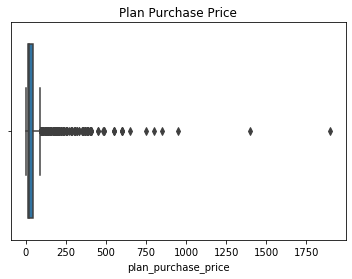

In [31]:
sns.boxplot(x=contracts_df2['plan_purchase_price']).set_title('Plan Purchase Price')

#### It looks like there are two outliers, let's take a look at them to see if anything jumps out

In [32]:
# Looking at plan purchase prices above 1250
contracts_df2[contracts_df2['plan_purchase_price'] > 1250]

,contract_id,variant_id,store_id,plan_id,ordered_at,plan_purchase_price,is_refunded,contract_length_years,line_item_id,year_ordered,...,month_ordered_int_ordrln,sortkey2,store_name,merchantcut,storetype,price_prdct,warranty_status,enabled,approved,category2
1724,88c3a9e6-4348-4489-9f58-56bee38c4f73,31601956388938,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-2y,2020-05-18 19:04:52,1399.0,False,2.0,5.291014e+12,2020,...,5.0,d2d139d8-f36d-4183-bc9d-61353623036c,LuxuryWatchDepot,0.35,Watches & Jewelry,15700.0,warrantable,True,True,GMT-Master II
2237,7c21d695-50d5-40fd-94c5-f4aa931d8e9e,31819902812234,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-3y,2020-04-27 17:31:49,1899.0,False,3.0,5.129215e+12,2020,...,4.0,d2d139d8-f36d-4183-bc9d-61353623036c,LuxuryWatchDepot,0.35,Watches & Jewelry,17200.0,warrantable,True,True,Daytona


### Product Purchase Price

Text(0.5, 1.0, 'Product Purchase Price')

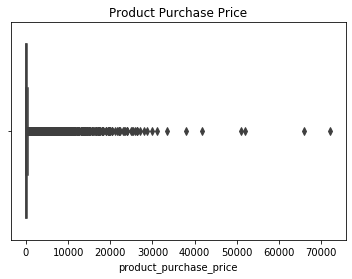

In [33]:
sns.boxplot(x=orderlines_df2['product_purchase_price']).set_title('Product Purchase Price')

In [34]:
# Looking at the product purchase prices over 50,000
orderlines_df2[orderlines_df2['product_purchase_price'] > 50000]

,line_item_id,order_id,variant_id,quantity,price,product_purchase_price,discount_per_item,is_warrantable,is_warranty,shipping_country,...,month_ordered_int,sortkey2,store_name,merchantcut,storetype,price_prdct,warranty_status,enabled,approved,category2
32481,5355436900426,2445945307210,3.190962e+13,1,50900.0,50900.0,0.0,False,False,United States,...,5,d2d139d8-f36d-4183-bc9d-61353623036c,LuxuryWatchDepot,0.35,Watches & Jewelry,50900.0,non-warrantable,True,False,Zeitwerk
34522,5355436933194,2445945307210,3.193773e+13,1,51900.0,51900.0,0.0,False,False,United States,...,5,d2d139d8-f36d-4183-bc9d-61353623036c,LuxuryWatchDepot,0.35,Watches & Jewelry,51900.0,non-warrantable,True,False,Annual Calendar
74350,4865671626826,2223941058634,3.179281e+13,1,66000.0,66000.0,0.0,False,False,United States,...,3,d2d139d8-f36d-4183-bc9d-61353623036c,LuxuryWatchDepot,0.35,Watches & Jewelry,66000.0,non-warrantable,True,False,Nautilus
81152,4816758571082,2201488883786,3.148833e+13,1,72150.0,72150.0,0.0,False,False,United States,...,3,d2d139d8-f36d-4183-bc9d-61353623036c,LuxuryWatchDepot,0.35,Watches & Jewelry,72150.0,non-warrantable,True,False,Daytona 'Big Red'


#### The most expensive products sold by merchants that have integrated Extend’s purchase protection product seem to be a couple of high-end watches.

### Merchant Cut and Contract Length

Text(0.5, 1.0, 'Contract Length')

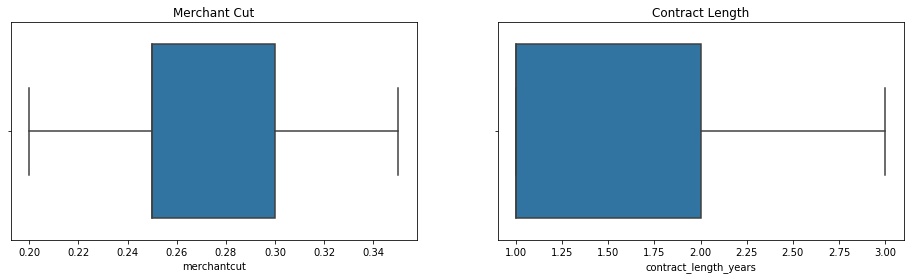

In [35]:
f, axes = plt.subplots(1, 2,  figsize=(16,4))

sns.boxplot(x=merchants_df['merchantcut'], ax = axes[0]).set_title('Merchant Cut')
sns.boxplot(x=contracts_df['contract_length_years'], ax = axes[1]).set_title('Contract Length')

#### Nothing crazy here. All the merchant cuts are between .2 and .35 and the contract lengths are between 1 and 3 years.

# Calculated Fields

### Revenue and Net Revenue Ratios

#### Now I'm going to create a couple new calculated fields, net revenue and net revenue as a percent of the product price.

Text(0.5, 1.0, 'Net Revenue Ratio')

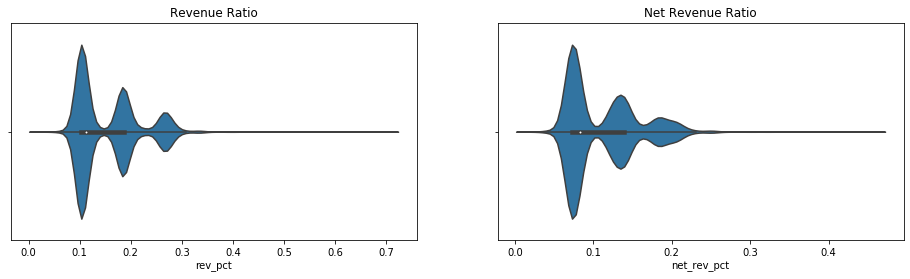

In [36]:
contracts_df2['net_rev'] = (contracts_df2['plan_purchase_price'] * (1 - contracts_df2['merchantcut']))
contracts_df2['rev_per_yr'] = contracts_df2['net_rev'] / contracts_df2['contract_length_years']
contracts_df2['net_rev_pct'] = contracts_df2['net_rev'] / contracts_df2['price']
contracts_df2['rev_pct'] = contracts_df2['plan_purchase_price'] / contracts_df2['price']
contracts_df2['rev_pct_yr'] = contracts_df2['rev_per_yr'] / contracts_df2['price']

f, axes = plt.subplots(1, 2,  figsize=(16,4))
sns.violinplot(x=contracts_df2['rev_pct'], ax=axes[0]).set_title('Revenue Ratio')
sns.violinplot(x=contracts_df2['net_rev_pct'], ax=axes[1]).set_title('Net Revenue Ratio')

Text(0.5, 1.0, 'Plan Price Per Year Ratio')

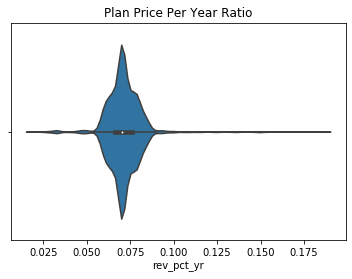

In [37]:
sns.violinplot(x=contracts_df2['rev_pct_yr']).set_title('Plan Price Per Year Ratio')

#### For revenue, let's look at every ratio above .4

In [38]:
rev_check = contracts_df2[contracts_df2['rev_pct'] > .4]
rev_check

,contract_id,variant_id,store_id,plan_id,ordered_at,plan_purchase_price,is_refunded,contract_length_years,line_item_id,year_ordered,...,price_prdct,warranty_status,enabled,approved,category2,net_rev,rev_per_yr,net_rev_pct,rev_pct,rev_pct_yr
336,1f1f9b30-365e-4130-811a-56e4524b557c,31504230187121,5dfad31f-9dc6-4e02-b8ba-ad59d42fa8d5,10001-misc-elec-base-replace-3y,2020-05-04 04:28:26,6.99,False,3.0,4.974157e+12,2020,...,9.99,warrantable,True,False,MOTOR,4.5435,1.514500,0.454805,0.699700,0.151602
490,8f154562-d1cd-4f08-8fc4-e32c712ddad0,29459742556273,5dfad31f-9dc6-4e02-b8ba-ad59d42fa8d5,10001-misc-elec-base-replace-3y,2020-05-31 14:17:35,6.99,False,3.0,5.146354e+12,2020,...,13.99,warrantable,True,False,MOTOR,4.5435,1.514500,0.324768,0.499643,0.108256
1027,4d3fc1e7-9448-4c36-9c75-645000854904,31452319809649,5dfad31f-9dc6-4e02-b8ba-ad59d42fa8d5,10001-misc-elec-base-replace-3y,2020-05-05 01:51:44,6.99,False,3.0,4.979733e+12,2020,...,14.99,warrantable,True,False,Unknown,4.5435,1.514500,0.303102,0.466311,0.101034
3228,4d3ba752-af7d-47af-a73f-26ce48728361,7796397211709,cbd9a3a0-8457-4bd9-abf6-5de6b62da6c2,10001-misc-elec-base-replace-2y,2020-05-25 16:34:56,3.69,False,2.0,4.597485e+12,2020,...,7.95,warrantable,True,True,Tweeters,2.7675,1.383750,0.348113,0.464151,0.174057
3657,d8da2120-f4c0-4ee8-9103-bdf2a54922db,13336512036921,2e1df809-4f73-4943-9bde-49fdbeddb8fc,10001-misc-elec-base-replace-3y,2020-05-30 12:52:42,11.99,False,3.0,4.633714e+12,2020,...,29.95,warrantable,True,True,Accessory,7.7935,2.597833,0.260217,0.400334,0.086739
3726,6600e7df-1bcf-469b-952b-61337af5aeeb,29459742556273,5dfad31f-9dc6-4e02-b8ba-ad59d42fa8d5,10001-misc-elec-base-replace-3y,2020-05-31 13:58:38,6.99,False,3.0,5.146279e+12,2020,...,13.99,warrantable,True,False,MOTOR,4.5435,1.514500,0.324768,0.499643,0.108256


*Looking at net revenue ratios above .3 yields similar results, but I left it out so as to not let this thing get too crowded.*

In [39]:
# Check to see what kinds of product categories have the smallest net revenue percent
rev_check2 = contracts_df2.sort_values(by=['rev_pct'], ascending=True).head(10)
rev_check2

,contract_id,variant_id,store_id,plan_id,ordered_at,plan_purchase_price,is_refunded,contract_length_years,line_item_id,year_ordered,...,price_prdct,warranty_status,enabled,approved,category2,net_rev,rev_per_yr,net_rev_pct,rev_pct,rev_pct_yr
1152,66dd4541-949b-4480-bce4-13753f9445b9,13671208419389,cbd9a3a0-8457-4bd9-abf6-5de6b62da6c2,10001-misc-elec-base-replace-1y,2020-04-01 02:46:49,9.49,False,1.0,4.427357e+12,2020,...,379.95,warrantable,True,True,Amplifiers,7.1175,7.1175,0.018733,0.024977,0.018733
2013,fae319d8-2a4e-4ca3-8e46-85e1d7e131f5,7796315815997,cbd9a3a0-8457-4bd9-abf6-5de6b62da6c2,10001-misc-elec-base-replace-1y,2020-03-04 03:49:56,13.99,False,1.0,4.366057e+12,2020,...,319.95,warrantable,True,True,Subwoofers,10.4925,10.4925,0.032794,0.043726,0.032794
2807,7a8168f8-c7a6-4e48-b30c-aba9cbd1a7de,31788810141770,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-1y,2020-05-07 13:08:43,389.00,False,1.0,5.207865e+12,2020,...,6450.00,warrantable,True,True,Explorer II,252.8500,252.8500,0.039202,0.060310,0.039202
796,3b7e671f-302d-4401-8182-c8a90da31e4f,32033223082058,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-1y,2020-05-22 22:19:00,369.00,False,1.0,5.320897e+12,2020,...,6100.00,warrantable,True,False,Datejust,239.8500,239.8500,0.039320,0.060492,0.039320
1838,59ec9f31-e2e8-480b-baa4-8ff803ff0dd1,31436229312586,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-1y,2020-05-16 23:32:46,379.00,False,1.0,5.279040e+12,2020,...,6250.00,warrantable,True,True,Chronomat,246.3500,246.3500,0.039416,0.060640,0.039416
1498,b2af4c2d-c2d8-425b-aa4f-b7b11b56091f,31781242339402,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-1y,2020-04-28 17:25:39,319.00,False,1.0,5.136673e+12,2020,...,5200.00,warrantable,True,True,Seamaster Planet Ocean,207.3500,207.3500,0.039875,0.061346,0.039875
1253,c5a9d2eb-e5dc-4041-a539-ca61cd276a9e,29416003829834,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-1y,2020-04-29 21:49:02,949.00,False,1.0,5.146443e+12,2020,...,15000.00,warrantable,True,True,GMT-Master II,616.8500,616.8500,0.041123,0.063267,0.041123
2370,77d89b5f-4a72-4b07-ad73-e6c1a397597b,31597758906442,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-1y,2020-04-23 19:37:52,649.00,False,1.0,5.100634e+12,2020,...,10150.00,warrantable,True,True,Datejust II,421.8500,421.8500,0.041562,0.063941,0.041562
1079,ae426056-3383-4c15-93a4-c3f5ba279cee,31608236179530,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-1y,2020-05-01 17:00:04,189.00,True,1.0,5.161660e+12,2020,...,2695.00,warrantable,True,True,Ronde Croisiere,122.8500,122.8500,0.045584,0.070130,0.045584
3991,fb7268a1-cd65-4d58-af69-b9fb717d7f69,31889837195338,d2d139d8-f36d-4183-bc9d-61353623036c,10001-crownandcaliber-watch-base-repair-1y,2020-05-19 02:24:20,259.00,False,1.0,5.293426e+12,2020,...,3675.00,warrantable,True,False,Reverso,168.3500,168.3500,0.045810,0.070476,0.045810


#### It looks like warranties from DroneWarehouse, specifically for what looks like are drone motors, cost the most per dollar spent on the product. Conversely, watches appear to cost the least. This is no doubt tied to the possibility of the product breaking. Drones probably break pretty often, and watches rarely do.

### Refund Rate

#### Since we only have three months worth of data, we're not going to be able to get a credible rough estimate of refund rates. Since the longest contract length is only 3 years, warranty development is pretty short-tailed. With enough volume over the next few years you can start using your own data to get a rough estimate. Until then, you would need to use external data to supplement your own.

In [40]:
category_df = (contracts_df2.groupby(['store_name'])
               .agg({'price':'sum', 'contract_id':'count', 'plan_purchase_price':'sum', 'is_refunded':'mean'})
               .reset_index()
               .rename(columns={'price':'product_revenue', 'contract_id':'contract_count',
                                'plan_purchase_price':'warranty_revenue', 'is_refunded':'refund_rate'})
               .sort_values(by=['refund_rate'], ascending=False))

category_df

,store_name,product_revenue,contract_count,warranty_revenue,refund_rate
7,LuxuryWatchDepot,261894.00,62,22418.00,0.145161
3,ElectricSkatePark,26582.00,38,3980.76,0.078947
4,FitnessWareables,208666.00,864,31465.36,0.047454
14,SkateboardsUSA,273432.95,172,38013.71,0.034884
0,CarStereoIsland,26397.60,240,3572.32,0.000000
1,DietTrackers,29919.00,97,4270.88,0.000000
2,DroneWarehouse,23154.51,367,2956.93,0.000000
5,HVAC4U,108137.23,339,18827.82,0.000000
6,HomeSecurityMart,91495.48,425,16264.35,0.000000
8,Photos4Grandma,97465.29,471,13512.29,0.000000


### Attach Rate

In [41]:
orderlines_df3['is_warranty'] = orderlines_df3['is_warranty'].astype(int)
store_df = (orderlines_df3.groupby(['store_name', 'storetype', 'month_ordered_int', 'merchantcut'])
               .agg({'price':'sum', 'line_item_id':'count', 'plan_purchase_price':'sum', 'is_warranty':'mean'})
               .reset_index()
               .rename(columns={'price':'product_revenue', 'contract_id':'contract_count',
                                'plan_purchase_price':'warranty_revenue', 'is_warranty':'attachment_rate',
                               'line_item_id':'order_line_count', 'month_ordered_int':'month_ordered'})
               .sort_values(by=['attachment_rate'], ascending=False))
store_df['month_ordered'] = store_df['month_ordered'].apply(lambda x: calendar.month_abbr[x])
store_df['attachment_rate_dollar'] = store_df['warranty_revenue'] / store_df['product_revenue']
store_df['net_revenue'] = store_df['warranty_revenue'] * (1 - store_df['merchantcut'])
store_df['net_attachment_rate_dollar'] = store_df['net_revenue'] / store_df['product_revenue']
store_df

,store_name,storetype,month_ordered,merchantcut,product_revenue,order_line_count,warranty_revenue,attachment_rate,attachment_rate_dollar,net_revenue,net_attachment_rate_dollar
32,RefurbPCLand,Consumer Electronics,Apr,0.25,13677.50,67,288.91,0.149254,0.021123,216.6825,0.015842
33,SecurityCamDirect,Home Security,Mar,0.25,45502.29,1005,1231.72,0.128358,0.027069,923.7900,0.020302
34,SecurityCamDirect,Home Security,Apr,0.25,76993.27,1708,2141.54,0.127635,0.027815,1606.1550,0.020861
9,ElectricSkatePark,Sports & Fitness Equipment,May,0.20,114096.66,182,2286.86,0.120879,0.020043,1829.4880,0.016035
31,RefurbPCLand,Consumer Electronics,Mar,0.25,225171.30,1233,3126.86,0.106245,0.013887,2345.1450,0.010415
7,ElectricSkatePark,Sports & Fitness Equipment,Mar,0.20,49318.80,78,647.95,0.089744,0.013138,518.3600,0.010510
10,FitnessWareables,Sports & Fitness Equipment,Mar,0.30,128026.51,546,2239.52,0.089744,0.017493,1567.6640,0.012245
8,ElectricSkatePark,Sports & Fitness Equipment,Apr,0.20,69153.51,102,1045.95,0.088235,0.015125,836.7600,0.012100
15,HVAC4U,Home and Garden,May,0.35,610470.06,2166,9756.18,0.087719,0.015981,6341.5170,0.010388
37,SiiickHeadphones,Consumer Electronics,Apr,0.25,76036.27,1497,1789.15,0.087508,0.023530,1341.8625,0.017648


In [42]:
avg_attach = orderlines_df3['is_warranty'].mean()
warranty_rev = store_df['warranty_revenue'].sum()
product_rev = store_df['product_revenue'].sum()
dol_attach = warranty_rev / product_rev

print('Overall attach rate:' + str(avg_attach))
print('Overall attach rate (dollar):' + str(dol_attach))

Overall attach rate:0.029678797070204908
Overall attach rate (dollar):0.005685814225847571


# Question 1: Integrity of the Data

#### I detailed the anamolies throughout this file, but I'll sum them up here.

- Made a few fixes to the products file to remove some escape characters.
- Removed the string "STORE::" from the beginning of the sortkey in the merchants table in order to join it to other tables.
- Cleaned up the Category field in the products table. There were a lot of instances where I needed to take a slice of the string. For example there were a lot of rows that looked like "Electronics > Computers > Laptops" instead of just "Laptops".
- There are 586 duplicate line_item_ids in the contracts table. Though they all have a unique contract_ids, I spot checked a few and they otherwise had identical information.I noted that this may be correct, but without more information I assumed that they were either erroneous or useless duplicates and removed them.
- There are 7152 missing values for the is_warrantable field in the order lines table. I was able to fill in 4308 of them by utilizing the is_warranty field in the same table. I was then able to fill in another 27 from the warranty_status field from the products table.
- There are 2579 variant_id's missing from order lines table.
- There are 11,054 non-null variant_id's in order lines table missing from products table.
- The products table is missing a lot of info. See "Identifying Columns with Missing Data" section for details on other missing items.
- A couple of high end watches are the only outliers as far as product price is concerned.
-  Warranties from DroneWarehouse, specifically for what looks like are drone motors, cost the most per dollar spent on the product.

# Question 2: Attach Rate Outliers

#### I'm going to choose to look into SecurityCamDirect and DroneWarehouse. While RefurbPCLand has a higher attachment rate in April, SecurityCamDirect is more consistent, has a higher attach rate on a dollar basis, and has a lot more data so we can assume the attach rates are more credible. DroneWarehouse has a fair amount of order lines and still has an attachment rate of 0 for April and less than 1% for May.

#### While I didn't choose to look into LuxuryWatchDepot, it's worth noting that drones and watches have low attachment rates for completely different reasons. Watch warranties are pretty cheap, but since watches rarely break I guess people rarely think a warranty is worth it. While drones, as previously mentioned, probably break somewhat often but the warranties are just too expensive for most people.

In [43]:
# Creating subsets of contract and order line data for the different stores
col = ['SecurityCamDirect', 'DroneWarehouse']
df = orderlines_df3[orderlines_df3['store_name'].isin(col)]
df2 = contracts_df2[contracts_df2['store_name'].isin(col)]
scd_df = df[df['store_name'] == 'SecurityCamDirect']
dw_df = df[df['store_name'] == 'DroneWarehouse']
scd_df2 = df2[df2['store_name'] == 'SecurityCamDirect']
dw_df2 = df2[df2['store_name'] == 'DroneWarehouse']

In [44]:
store_df2 = (df.groupby(['store_name', 'category2'])
               .agg({'price':'sum', 'line_item_id':'count', 'plan_purchase_price':'sum', 'is_warranty':'mean'})
               .reset_index()
               .rename(columns={'price':'product_revenue', 'contract_id':'contract_count',
                                'plan_purchase_price':'warranty_revenue', 'is_warranty':'attachment_rate',
                               'line_item_id':'order_line_count', 'month_ordered_int':'month_ordered'})
               .sort_values(by=['store_name', 'attachment_rate'], ascending=[False,False]))
store_df2['attachment_rate_dollar'] = store_df2['warranty_revenue'] / store_df2['product_revenue']

store_df2

,store_name,category2,product_revenue,order_line_count,warranty_revenue,attachment_rate,attachment_rate_dollar
22,SecurityCamDirect,Unknown,4474.44,436,0.00,1.000000,0.000000
17,SecurityCamDirect,Action Camera Accessories,104.97,3,0.00,0.000000,0.000000
18,SecurityCamDirect,Cloud,6279.27,97,0.00,0.000000,0.000000
19,SecurityCamDirect,Dome Camera,16238.96,504,238.42,0.000000,0.014682
20,SecurityCamDirect,Home Camera,152228.63,2782,4016.05,0.000000,0.026382
21,SecurityCamDirect,Smart Dash Camera,12143.70,231,201.80,0.000000,0.016618
13,DroneWarehouse,Unknown,1292811.46,44660,2800.21,0.008374,0.002166
0,DroneWarehouse,3D Printed Products,8475.77,2041,0.00,0.000000,0.000000
1,DroneWarehouse,Accessory,4245.92,208,7.99,0.000000,0.001882
2,DroneWarehouse,Battery,94146.89,4894,18.85,0.000000,0.000200


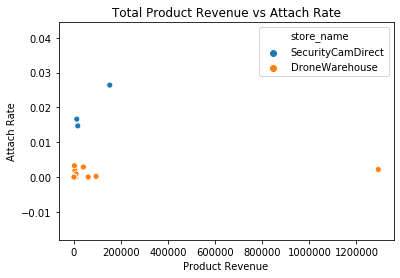

In [45]:
col = ['SecurityCamDirect', 'DroneWarehouse', 'LuxuryWatchDepot']



# f, axes = plt.subplots(1, 2,  figsize=(20,8))
sctr = (sns.scatterplot(x = 'product_revenue', y = 'attachment_rate_dollar', data = store_df2, hue='store_name')
       .set(title='Total Product Revenue vs Attach Rate', xlabel='Product Revenue', ylabel='Attach Rate'))

# sctr = (sns.scatterplot(x = 'price', y = 'plan_purchase_price', data = dw_df2, ax=axes[1], hue='category2')
#        .set(title='DroneWarehouse Product vs. Warranty Price', xlabel='Product Price', ylabel='Warranty Price'))

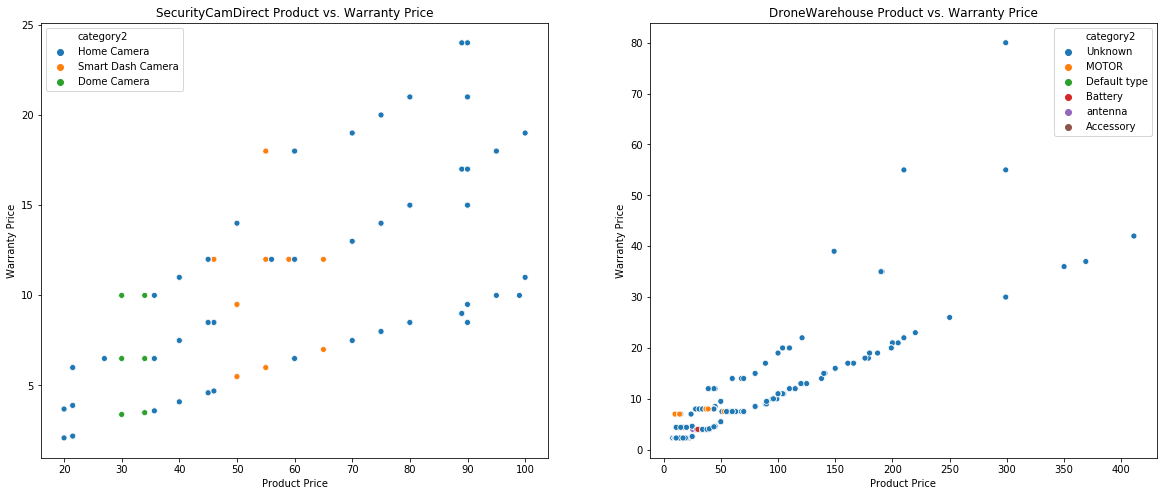

In [46]:
col = ['SecurityCamDirect', 'DroneWarehouse', 'LuxuryWatchDepot']

f, axes = plt.subplots(1, 2,  figsize=(20,8))
sctr = (sns.scatterplot(x = 'price', y = 'plan_purchase_price', data = scd_df2, ax=axes[0], hue='category2')
       .set(title='SecurityCamDirect Product vs. Warranty Price', xlabel='Product Price', ylabel='Warranty Price'))

sctr = (sns.scatterplot(x = 'price', y = 'plan_purchase_price', data = dw_df2, ax=axes[1], hue='category2')
       .set(title='DroneWarehouse Product vs. Warranty Price', xlabel='Product Price', ylabel='Warranty Price'))

It looks like there are 2 or 3 distinct lines in this plot. Let's look at contract length to see if that's what's driving this.

C:\Users\Pat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


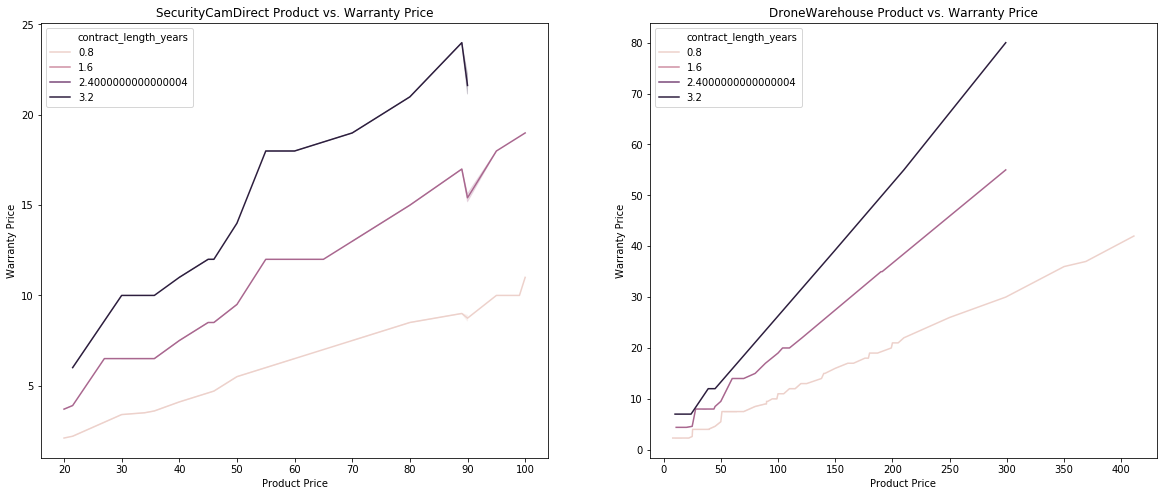

In [47]:
col = ['SecurityCamDirect', 'DroneWarehouse', 'LuxuryWatchDepot']


scd_df2['contract_length_years'] = scd_df2['contract_length_years'].round(decimals=1)

f, axes = plt.subplots(1, 2,  figsize=(20,8))
sctr = (sns.lineplot(x = 'price', y = 'plan_purchase_price', data = scd_df2, ax=axes[0], hue='contract_length_years')
       .set(title='SecurityCamDirect Product vs. Warranty Price', xlabel='Product Price', ylabel='Warranty Price'))

sctr = (sns.lineplot(x = 'price', y = 'plan_purchase_price', data = dw_df2, ax=axes[1], hue='contract_length_years')
       .set(title='DroneWarehouse Product vs. Warranty Price', xlabel='Product Price', ylabel='Warranty Price'))

Indeed it was! It's unsuprising to see that longer contracts cost more and that there's a pretty discrete jump between the different options.

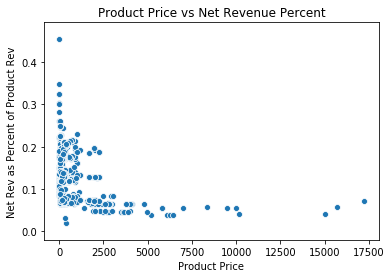

In [48]:
col = ['SecurityCamDirect', 'DroneWarehouse', 'LuxuryWatchDepot']

sctr = (sns.scatterplot(x = 'price', y = 'net_rev_pct', data = contracts_df2)
       .set(title='Product Price vs Net Revenue Percent', xlabel='Product Price', ylabel='Net Rev as Percent of Product Rev'))

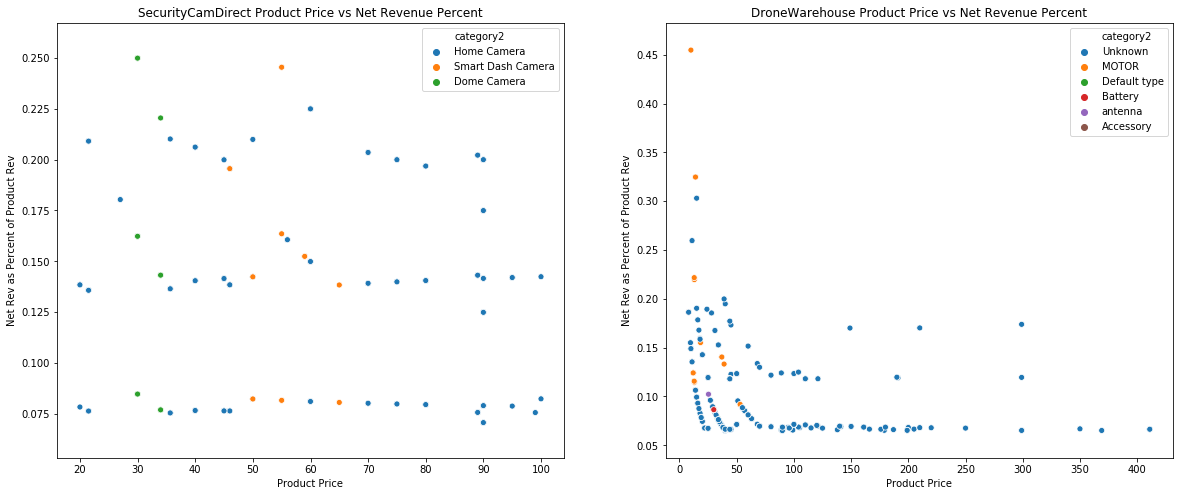

In [49]:
col = ['SecurityCamDirect', 'DroneWarehouse', 'LuxuryWatchDepot']

f, axes = plt.subplots(1, 2,  figsize=(20,8))
sctr = (sns.scatterplot(x = 'price', y = 'net_rev_pct', data = scd_df2, ax=axes[0], hue='category2')
       .set(title='SecurityCamDirect Product Price vs Net Revenue Percent', xlabel='Product Price',
            ylabel='Net Rev as Percent of Product Rev'))

sctr = (sns.scatterplot(x = 'price', y = 'net_rev_pct', data = dw_df2, ax=axes[1], hue='category2')
       .set(title='DroneWarehouse Product Price vs Net Revenue Percent', xlabel='Product Price',
            ylabel='Net Rev as Percent of Product Rev'))

Dronewarehouse products behave very similar to the overall plot, while the ratios for SecurityCamDirect are pretty all over the place.

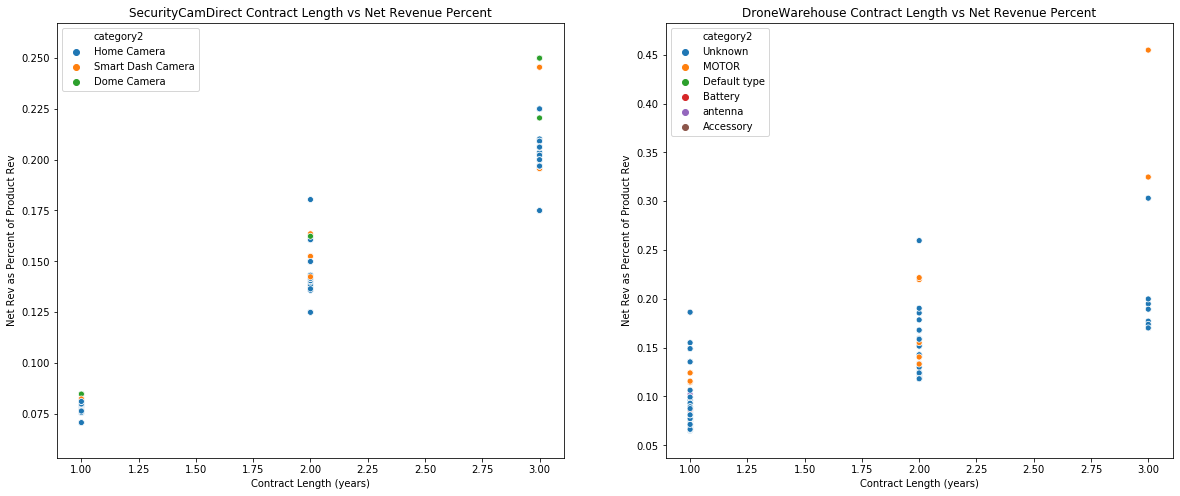

In [50]:
f, axes = plt.subplots(1, 2,  figsize=(20,8))

sctr = (sns.scatterplot(x = 'contract_length_years', y = 'net_rev_pct', data = scd_df2, hue='category2', ax=axes[0])
       .set(title='SecurityCamDirect Contract Length vs Net Revenue Percent',
            xlabel='Contract Length (years)', ylabel='Net Rev as Percent of Product Rev'))

sctr = (sns.scatterplot(x = 'contract_length_years', y = 'net_rev_pct', data = dw_df2, hue='category2', ax=axes[1])
       .set(title='DroneWarehouse Contract Length vs Net Revenue Percent',
            xlabel='Contract Length (years)', ylabel='Net Rev as Percent of Product Rev'))

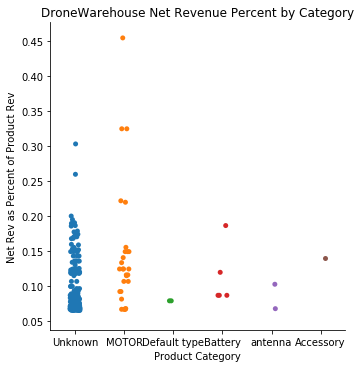

In [51]:
sctr = (sns.catplot(x = 'category2', y = 'net_rev_pct', data = dw_df2)
       .set(title='DroneWarehouse Net Revenue Percent by Category',
            xlabel='Product Category', ylabel='Net Rev as Percent of Product Rev'))

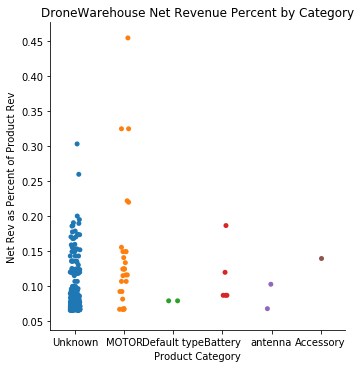

In [52]:
sctr = (sns.catplot(x = 'category2', y = 'net_rev_pct', data = dw_df2)
       .set(title='DroneWarehouse Net Revenue Percent by Category',
            xlabel='Product Category', ylabel='Net Rev as Percent of Product Rev'))

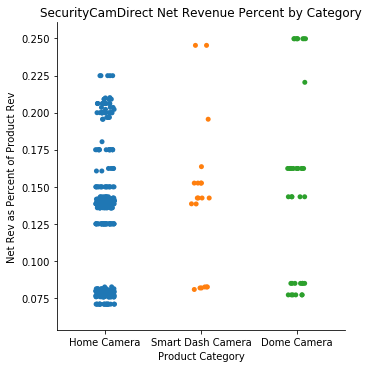

In [53]:
sctr = (sns.catplot(x = 'category2', y = 'net_rev_pct', data = scd_df2)
       .set(title='SecurityCamDirect Net Revenue Percent by Category',
            xlabel='Product Category', ylabel='Net Rev as Percent of Product Rev'))

## Question 2 Summary

#### I was a bit limited in my analysis for a few reasons. Having only 3 months of data prohibited me from looking for any sort of trend across the months/years. I was also unable to look at the impact of seasonality on the data. Having only 3 months also prevented me from doing any sort of meaningful dive into refund rates. I was also missing product detail for a lot of orders, this included the largest Dronewarehouse product (labeled as "Unknown" above). 

#### DroneWarehouse has some of the largest outliers when it comes to warranty price. But other than that, their products behave pretty similarly to other stores and prodcuts. It trends up with product price and contract length just like eveyrthing else, and hovers between a net revenue ratio of .075 and .25. Contract lengths are typically 1 or 2 years. The fewer amount of 3 year contracts tells me if something were to go wrong it would happen relatively quickly. Drones are pretty expensive though, I understand that the prospect of spending an extra 20 dollars for a 200 dollar drone might be seen as unnecessary. The fact that a 10 dollar warranty for a 60 dollar security camera is more expensive relative to the product itself doesn't seem to deter people from buying them though. The smaller whole dollar value might make it seem like an inconsequential tack-on. 

#### SecurityCamDirect warranty prices scale pretty favorable for us as product price goes up. Most other product's net revenue percent roughly follows a pareto distribution as product price goes up, while products for SecurityCamDirect are pretty all over the place. This means that as consumers spend more on a products, our slice of the pie doesn't decrease as much as it does for other products. This coupled with the relatively high attach rate should make it a very desirable product for Extend.